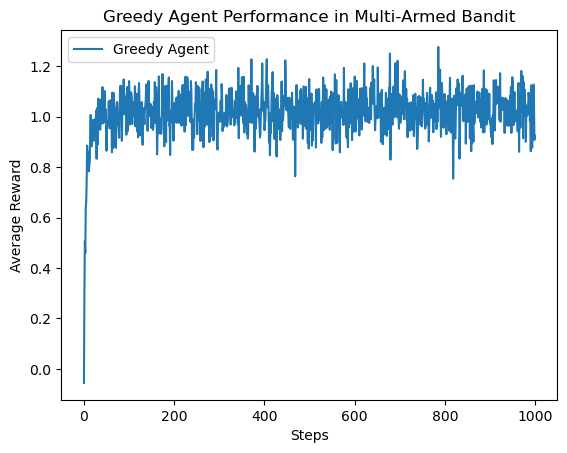

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Environment: Multi-armed bandit problem
class BanditEnvironment:
    def __init__(self, k=5):
        self.k = k
        self.q_true = np.random.randn(k)  # true action values

    def step(self, action):
        # Reward is drawn from a normal distribution with mean = true value
        reward = np.random.randn() + self.q_true[action]
        return reward

# Greedy Agent
class GreedyAgent:
    def __init__(self, k=5):
        self.k = k
        self.Q = np.zeros(k)     # Estimated action values
        self.N = np.zeros(k)     # Number of times each action was chosen

    def select_action(self):
        # Always pick action with the highest estimated value (greedy)
        return np.argmax(self.Q)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]

# Experiment
def run_greedy_agent(runs=200, steps=1000, k=5):
    avg_rewards = np.zeros(steps)

    for _ in range(runs):
        env = BanditEnvironment(k)
        agent = GreedyAgent(k)
        rewards = []

        for t in range(steps):
            action = agent.select_action()
            reward = env.step(action)
            agent.update(action, reward)
            rewards.append(reward)

        avg_rewards += np.array(rewards)

    avg_rewards /= runs
    return avg_rewards

# Run and Plot
if __name__ == "__main__":
    steps = 1000
    avg_rewards = run_greedy_agent(runs=200, steps=steps, k=10)

    plt.plot(avg_rewards, label="Greedy Agent")
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title("Greedy Agent Performance in Multi-Armed Bandit")
    plt.legend()
    plt.show()
